# **Waze Project**

## Build a Dataframe 
Importing of pandas and numpy other than the actual dataframe we are gonna be working on.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/edoardochiari/Desktop/Github ADD/Waze/waze.csv')

## Inspect the data 
View and inspect summary informations about the dataframe

In [71]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [73]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


From the output of the `head` function, we can observe that the first 10 rows contain no missing values. However, after running the `info` function, it becomes clear that the dataset does have missing values, specifically 700 in the 'label' column.

Regarding data types, the dataset consists of 13 columns: three of type `float64`, eight of type `int64`, and two of type `object`, with a total of 14,999 rows.

## Understand the data
Given the large number of null values, a good starting point would be to investigate whether there is a noticeable difference between a sample with no null values and one consisting entirely of null values in the 'label' column.

In [76]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]
# Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [77]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Comparing the summary statistics of the two groups reveals a very low difference between the two samples due to the means and standard deviations being relatively similar to eachother.

Another important step would be to compare the two populations based on device type, determining whether iPhone or Android users had the majority of the null values.

In [80]:
# Get count of null values by device
null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

In [81]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

Out of the 700 rows with null values, 447(64%) were iPhone users and 253(36%) were Android users. However how would this compare to the device ratio in the full dataset?

In [83]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

The percentage of the missing values by each device is consistent with their representation in the data overall.

What about examining the count and percentages of users who chured vs. those who retained?

In [86]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


The dataset contains 11763(82%) retained and 2536(18%) churned users.

To better understand the differences between churned and retained users, the median of each variable should be compared, rather than the mean. The median provides a more accurate representation of the typical user by minimizing the impact of outliers, which could skew the results if we used the mean. This approach ensures that extreme values do not distort the comparison, offering a clearer insight into the central tendencies of the churned versus retained users.

In [88]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Churned users, on average, completed about three more drives in the last month than those who were retained, but retained users accessed the app on more than twice as many days during that same period. 

When looking at the median values, churned users drove approximately 200 more kilometers and spent 2.5 additional hours on the road compared to retained users. 

This suggests that churned users had more drives condensed into fewer days, with longer and farther trips. These patterns could potentially indicate a distinct user profile, where churned users exhibit higher-intensity app usage over shorter periods, which may contribute to their eventual churn.

To further the study, a good idea could be to clauclate the median kilometers per drive for both retained and churned users:

In [91]:
# Add a column to df called `km_per_drive`
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median of the churned user is about one kilometer shorter with respect to the retained one. How many kilometers per driving day was this? What about the number of drives per driving day?

In [93]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Group by `label`, calculate the median for both columns at once
median_values = df.groupby('label').median(numeric_only=True)[['km_per_driving_day', 'drives_per_driving_day']]

median_values

,km_per_driving_day,drives_per_driving_day
label,,
churned,697.541999,10.0000
retained,289.549333,4.0625


The median churned user drove an impressive 698 kilometers on each day they were active last month, which is approximately 240% more than the median retained user’s per-drive-day distance. In addition, the churned users exhibited a similarly disproportionate number of drives per day compared to retained users.

These figures highlight that, regardless of churn status, the users in this dataset are exceptionally heavy drivers. This suggests that the data may not reflect the behavior of typical drivers; instead, it likely includes a significant number of professional or long-haul drivers. In particular, the high driving volume among churned users points to the possibility that this group contains a large proportion of long-haul truckers.

Given the intensity of their driving habits, it would be valuable for Waze to gather more targeted data on these "super-drivers." Their extensive driving may be linked to unmet needs that differ from those of the average driver, such as daily commuters. Understanding why these users drive so much could reveal insights into why the Waze app may not fully meet their unique requirements, potentially offering opportunities for tailored improvements.

In conclusion, an examination on whether there is an imbalance in how many users churned by device type, could provide useful insights.

In [96]:
# Calculate the count of Android and iPhone users for each label
device_counts = df.groupby(['label', 'device']).size().unstack()

# Calculate the percentage of Android and iPhone users for each label
device_percentages = df.groupby('label')['device'].value_counts(normalize=True).unstack() * 100

# Merge the counts and percentages into a single table
combined_table = pd.concat([device_counts, device_percentages], axis=1, keys=['Count', 'Percentage'])

# Display the final table
combined_table


Count        Percentage           
device   Android iPhone    Android     iPhone
label                                        
churned      891   1645  35.134069  64.865931
retained    4183   7580  35.560656  64.439344

The ratio of iPhone to Android users remains consistent across both the churned and retained groups, mirroring the ratio found in the overall dataset. This suggests that the distribution of device types does not significantly differ between users who churn and those who remain active, indicating that device preference is not a notable factor in user retention or churn in this case.

## Initial Analysis Observations
The dataset contained 700 missing values in the "label" column, with no discernible pattern to the missing data. When analyzing the data, the median was preferred over the mean because the median is less affected by outliers, providing a better representation of a typical user in the presence of extreme values.

Further questions arose from the investigation, particularly regarding the driving behavior of churned users. For example, the median churned user drove 698 kilometers per driving day, about 240% more than retained users. It would be important to understand how this data was collected and whether it reflects a non-random sample of users.

Regarding device distribution, about 36% of users were Android users, while 64% were iPhone users. However, there was no significant difference in churn rates between the two groups; the churn rates for iPhone and Android users were within one percentage point of each other, suggesting no correlation between device type and churn.

In terms of distinguishing characteristics, churned users tended to drive farther and for longer durations but did so over fewer days compared to retained users. Additionally, churned users used the app about half as often as retained users during the same period. These patterns point to differences in usage intensity between the two groups.

## Data Visualization

***Sessions count last month:***

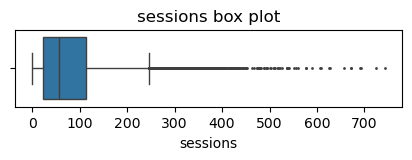

In [101]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

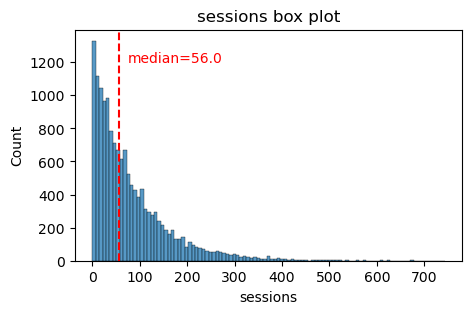

In [102]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

The variable 'session' has a right-skewed distribution, with half of the observations having 56 or fewer sessions. However, based on the boxplot, there are some cases where the number of sessions can reach as high as 700.

***Drives count:***

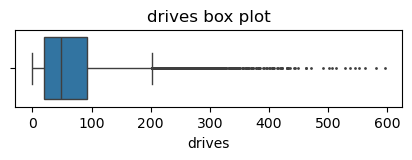

In [105]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

In [106]:
#In order to avoid copy pasting the same function for each histogram, a function can be created.
# Helper function to plot histograms based on the format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

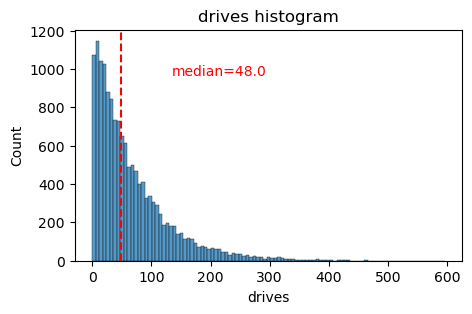

In [107]:
histogrammer('drives')

The distribution of the 'drives' variable is similar to that of the 'sessions' variable, showing a right-skewed pattern. It has a median of 48, with some instances reaching as high as 400.

***Total sessions count:***

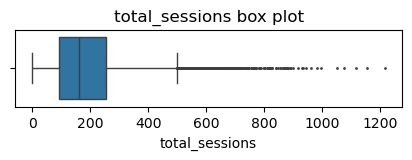

In [110]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

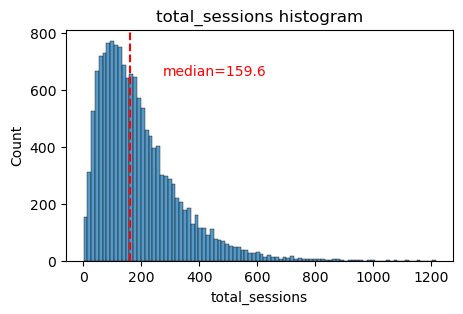

In [111]:
# Histogram
histogrammer('total_sessions')

Even though the distribution seems to be the same as in previous cases, an interesting observation can be drawn by the median being equal to 159.6. Given that the median for the last month was 56, it seems that a large proportion of user's total drives might have taken place in the last month. Further examination is needed.

***Number of days since singing for the app:*** 

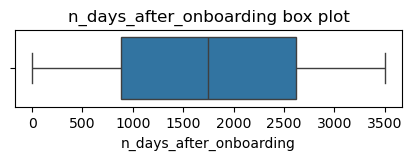

In [114]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


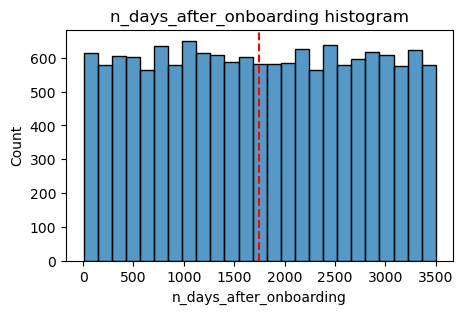

In [115]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure is a uniform distribution with values ranging from almost zero to 3.5000 (=9.5 years).

***Total kilometers driven during the last month:***

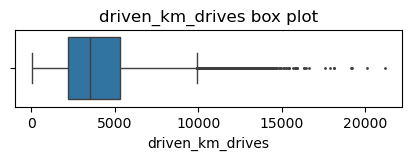

In [118]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

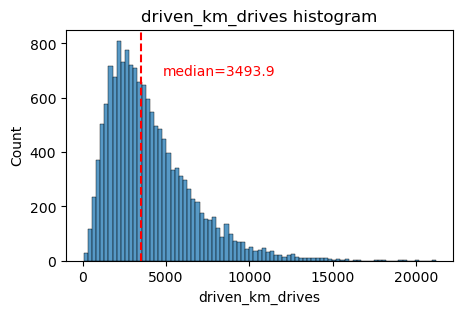

In [119]:
# Histogram
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half of the users driving under 3.494 kilometers.

***Total duration driven in minutes during the month:***

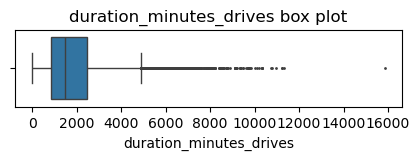

In [122]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

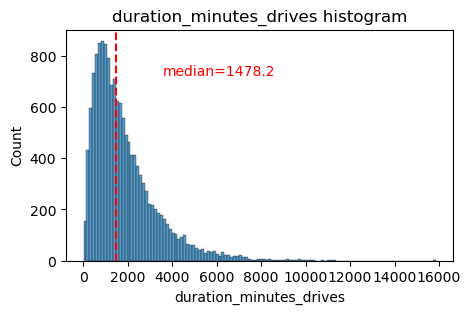

In [123]:
# Histogram
histogrammer('duration_minutes_drives')

From the histogram, half of the users drove less than 1478 minutes(=25 hours), but some users clocked over 250 hours over the month.

***Number of days the user opens the app during the month:***

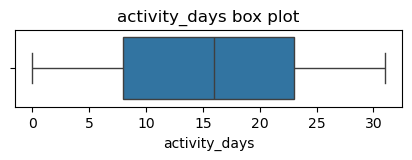

In [126]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


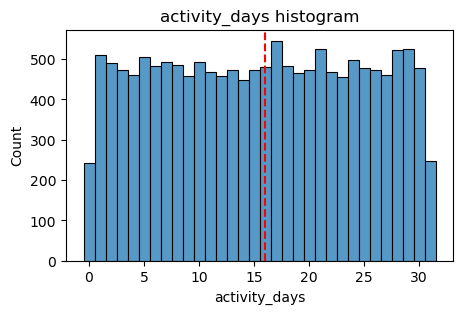

In [127]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

In the past month, users opened the app a median of 16 times. The box plot indicates a relatively centered distribution. The histogram illustrates a nearly uniform distribution, with around 500 users opening the app on each day. However, there are approximately 250 users who did not open the app at all and another 250 who opened it every day of the month.

This distribution is significant because it does not reflect the sessions distribution, which one might expect to be closely related to the number of active days.

***Number of days the user drives(at least 1km) during the month:***

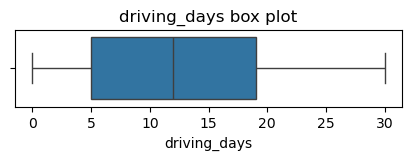

In [130]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


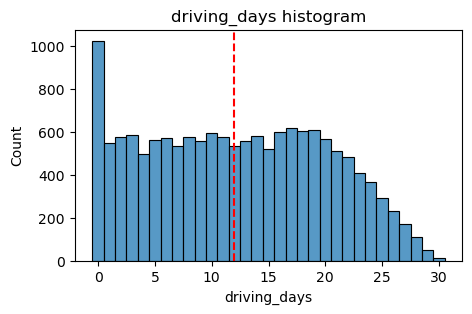

In [131]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The average number of days users drove each month was consistent, and this closely matched the number of days they opened the app. However, there were fewer days when users drove compared to when they opened the app, especially for higher numbers of days.

Surprisingly, there were nearly twice as many users who didn't drive at all compared to those who opened the app every day. This seems unusual given that many users opened the app on most days but didn't drive.

***Types of device a user starts a session with:***

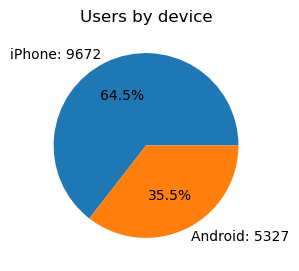

In [134]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

***Binary target variable for if a user has churned anytimer during the course of the month:***

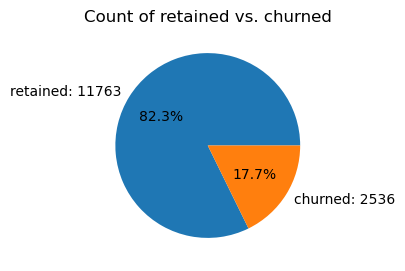

In [137]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

***Driving days vs. Activity days:***

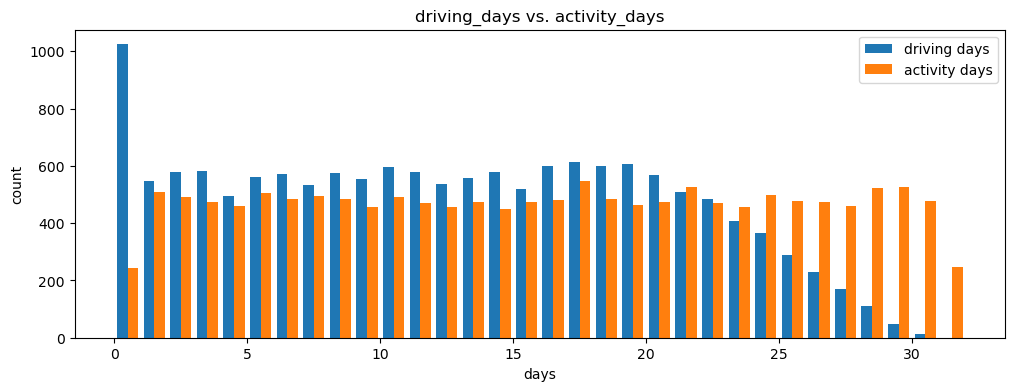

In [140]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As noted, it's surprising that fewer people didn't use the app at all, yet more didn't drive. This might suggest that while these activities are linked, they're not identical. People might open the app more frequently than they drive, perhaps to check traffic, adjust settings, or even by accident.

It would be valuable to consult the Waze data team for further insights, especially considering the discrepancy in the number of days for each activity. For now confirmin the maximum number of days for each variable could prove usefull.

In [142]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


In fact, the number of days changes between variables. In order to assure the validity of the variables is to plot a simple scatter plot with the x-axis representing one varibale and on the y-axis the other.

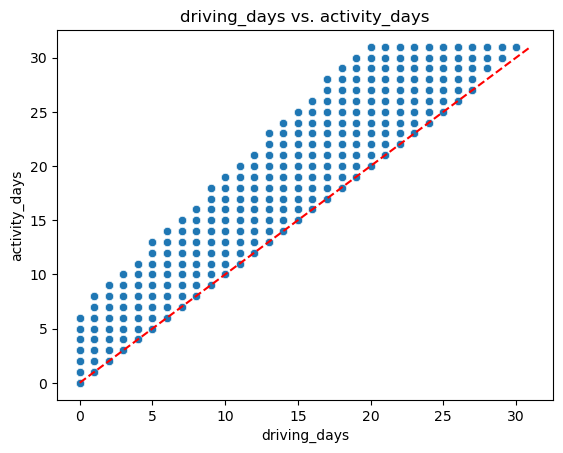

In [144]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

On the graph it's possible to see that if you use the app to drive, then by definition it must count as a day-use as well. None of the samples in this data violate this rule, which is optimal.

***Retention by device*** 

In order to show how many iPhone and Android users were retained/churned, we plot a histogram.

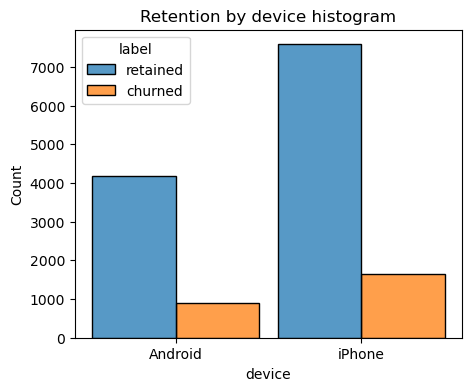

In [148]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained is consistent between device types.

***Retention by kilometer driven per driving day***

First thing to do would be to create a new variable in order to know the mean kilometers per driving day.

In [152]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

It seems to be some issues since the mean is infinite and the standard deviation is NaN. This is given by the fact that in the driving day column there are some variables that have zero as values. Dividing by zero gives an undefined value (infinity). 
By converting the values from infinity to zero:

In [154]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Having as a maximum value 15420 kilometers per drive days signals a problem since it's phisically impossible to do that distance in one day. Having this issue we can assume a general average distance per day(1200km), disregarding those users with values greater than the average.
Considering all this, we can now plot an histogram with the new column created.

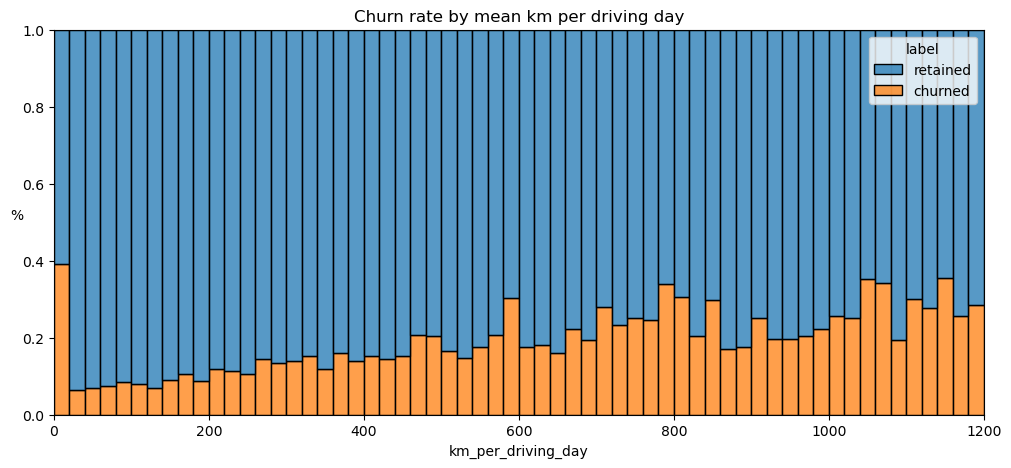

In [156]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases

***Churn rate per number of driving days***

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

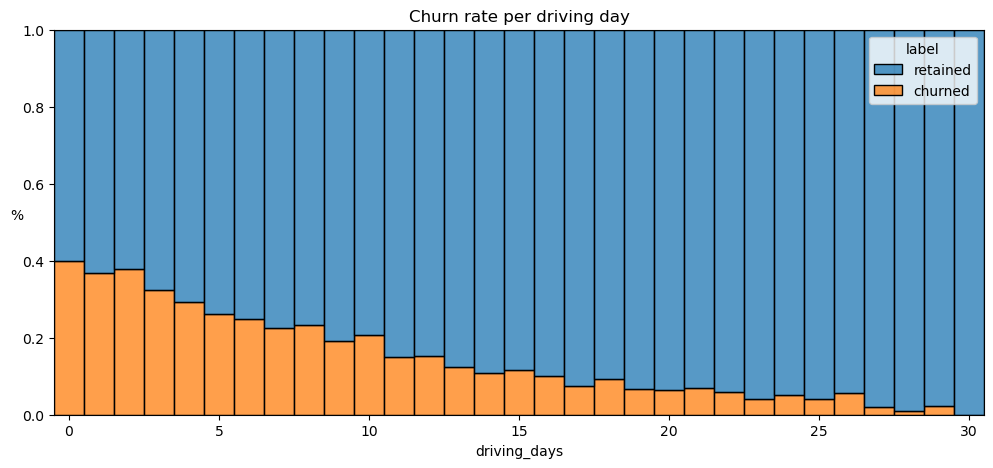

In [160]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is the highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the ysers who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn’t surprising. If frequent app users churn, it likely signals dissatisfaction. However, when infrequent users churn, it could stem from past dissatisfaction or simply reflect a reduced need for a navigation app. 

***Proportion of sessions that occured in the last month***

First off, the creation of a new variable representing the percentage of each user's total sessions that were logged in their last month of use is necessary.

In [164]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new variable? 

In [166]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

To get a better understanding of the distribution, a histogram seems the most viable optioin.

Median: 0.4


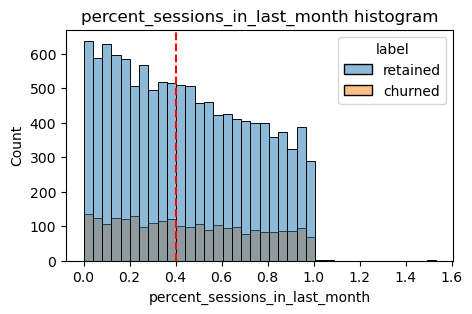

In [168]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

Check the median value of the `n_days_after_onboarding` variable.

In [170]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Focusing on the number of days after onboarding for just the people who had 40% or more of their total sessions in the last month:

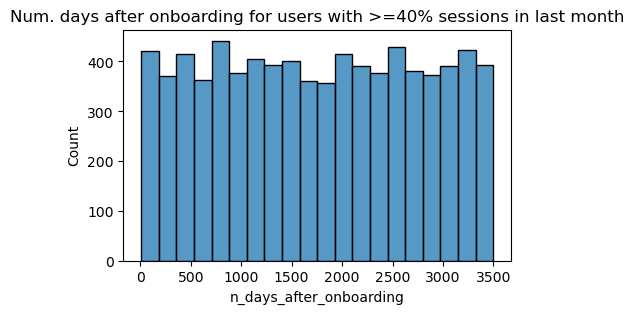

In [172]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users who had 40% or more of their total sessions in the last month follows a uniform distribution, which is unusual. It’s worth investigating why so many long-term users suddenly increased their app usage recently.

### Handling outliers ###

The box plots from the previous section show that many variables contain outliers. These outliers don’t appear to be due to data entry errors but are instead a result of right-skewed distributions.

It may be helpful to replace outliers with more reasonable values. A common approach is to set a threshold based on a certain percentile of the distribution.

To apply this method, a function that calculates the 95th percentile for a given column and replaces values exceeding this threshold with the 95th percentile itself needs to be created.

In [176]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Now that the function has been created, let's apply it to specific columns.

In [178]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [179]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


### Conclusion ###

***Questions:***

- What types of distributions did you notice in the variables? What did this tell you about the data?

Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable

- Was there anything that led you to believe the data was erroneous or problematic in any way?

Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

- Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

- What percentage of users churned and what percentage were retained?

Less than 18% of users churned, and ~82% were retained.

- What factors correlated with user churn? How?

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn

- Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

No. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.

## Statistical Analysis

***Import additional packages***

In [190]:
from scipy import stats

***Hypothesis Testing***

Before conducting the hypothesis testing it's necessary to define the hypothesis for this project.

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Let's consider a 5% as the significance level and proceed with a two-sample test.

In [193]:
# Drop all the rows with missing values
df = df.dropna(axis=0)

# Save each sample in a variable
iPhone = df[df['device'] == "iPhone"] ['drives']
Android = df[df['device'] == "Android"] ['drives']

# Implement a t-test using the two samples
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.3767395273847367, pvalue=0.16862179297129276, df=10628.082467668708)

Given that the p-value is greater than the chosen significance level(5%), the null hypothesis fails to be rejected. This implies that there is not a statistically significant difference in the average number of drives between drivers who use iPhone and drivers who use Androids. 

***Insights***

The main takeaway for the business is that, on average, drivers using iPhones have a similar number of trips as those using Android devices.

A possible next step could be to examine other factors that might affect the variation in the number of drives and conduct additional hypothesis tests to gain deeper insights into user behavior. Additionally, implementing short-term changes in marketing strategies or the Waze app’s interface could generate useful data to further explore user churn.

## Regression modeling

In [198]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Explore data

In [200]:
print(df.shape)
df.info()

(14292, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 14292 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14292 non-null  int64  
 1   label                           14292 non-null  object 
 2   sessions                        14292 non-null  int64  
 3   drives                          14292 non-null  int64  
 4   total_sessions                  14292 non-null  float64
 5   n_days_after_onboarding         14292 non-null  int64  
 6   total_navigations_fav1          14292 non-null  int64  
 7   total_navigations_fav2          14292 non-null  int64  
 8   driven_km_drives                14292 non-null  float64
 9   duration_minutes_drives         14292 non-null  float64
 10  activity_days                   14292 non-null  int64  
 11  driving_days                    14292 non-null  int64  
 12  device                   

In [201]:
# Remove specified columns
df = df.drop(columns=['ID', 'km_per_drive', 'km_per_driving_day', 'drives_per_driving_day', 'percent_sessions_in_last_month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14292 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14292 non-null  object 
 1   sessions                 14292 non-null  int64  
 2   drives                   14292 non-null  int64  
 3   total_sessions           14292 non-null  float64
 4   n_days_after_onboarding  14292 non-null  int64  
 5   total_navigations_fav1   14292 non-null  int64  
 6   total_navigations_fav2   14292 non-null  int64  
 7   driven_km_drives         14292 non-null  float64
 8   duration_minutes_drives  14292 non-null  float64
 9   activity_days            14292 non-null  int64  
 10  driving_days             14292 non-null  int64  
 11  device                   14292 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [202]:
df['label'].value_counts(normalize=True)

label
retained    0.822698
churned     0.177302
Name: proportion, dtype: float64

In [203]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000
mean,76.577176,64.045900,183.700090,1751.977120,121.712427,29.633361,3943.778188,1792.708543,15.551147,12.188497
std,67.238299,55.246631,118.601732,1008.610971,147.665950,45.350345,2217.279739,1224.309116,9.013404,7.831111
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.466649,878.750000,10.000000,0.000000,2217.278591,839.816701,8.000000,5.000000
50%,56.000000,48.000000,158.728448,1749.000000,71.000000,9.000000,3496.214642,1479.201628,16.000000,12.000000
75%,112.000000,93.000000,253.564188,2627.250000,178.000000,43.000000,5299.878068,2466.213869,23.000000,19.000000
max,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000


### Features creation

Fistly, let's create some features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

**`km_per_driving_day`**

Creation of a new column called `km_per_driving_day` , which represents the mean distance driven per driving day for each user. 

In [262]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    1.429200e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675429e+02
50%      3.233661e+02
75%      7.408162e+02
max               inf
Name: km_per_driving_day, dtype: float64

In the data we have an infinite value; this implies that there are some zero values in the `driving_days` column. In order to solve this issue, we convert these values from infinity to zero.

In [264]:
# Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14292.000000
mean       567.221587
std        970.053865
min          0.000000
25%        136.238960
50%        273.755019
75%        543.590089
max       8889.794236
Name: km_per_driving_day, dtype: float64

**`professional_driver`**

For this new variable we need to create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives AND drove on 15+ days in the last month.

In [266]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

# Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    11804
1     2488
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801254
                     churned     0.198746
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signals to the model.

### Preparing variables

**Impute outliers**

Previously, we determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, we impute the outlying values of these columns.


In [268]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

df.describe()


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.00000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000
mean,76.577176,63.996012,183.700090,1751.977120,114.541492,27.18108,3943.778188,1792.610152,15.551147,12.188497,567.221587,0.174083
std,67.238299,55.123243,118.601732,1008.610971,124.367123,36.70953,2217.279739,1224.078011,9.013404,7.831111,970.053865,0.379194
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.00000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.466649,878.750000,10.000000,0.00000,2217.278591,839.816701,8.000000,5.000000,136.238960,0.000000
50%,56.000000,48.000000,158.728448,1749.000000,71.000000,9.00000,3496.214642,1479.201628,16.000000,12.000000,273.755019,0.000000
75%,112.000000,93.000000,253.564188,2627.250000,178.000000,43.00000,5299.878068,2466.213869,23.000000,19.000000,543.590089,0.000000
max,243.000000,200.000000,454.363204,3500.000000,422.000000,124.00000,8889.794236,4666.931419,31.000000,30.000000,8889.794236,1.000000


**Encode categorical variables**

In order to treain a logistic regression model, it's necessary to change the data type of the `label` column to be binary. `0` will be assigned to all `retained` users while for the `churned` ones will have `1`. All of this will be saved in a different variable called `label2` as to not overwrite the original `label` variable.

In [270]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [1056]:
# Drop label column 
df = df.drop(columns=['label'])

### Determine wheter assumptions have been met

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we can assume that observations are independent.
The second assumption has already been adressed.
The last assumption will be verified after modeling.

**Collinearity**

Checking for the correlation among predictor variables.

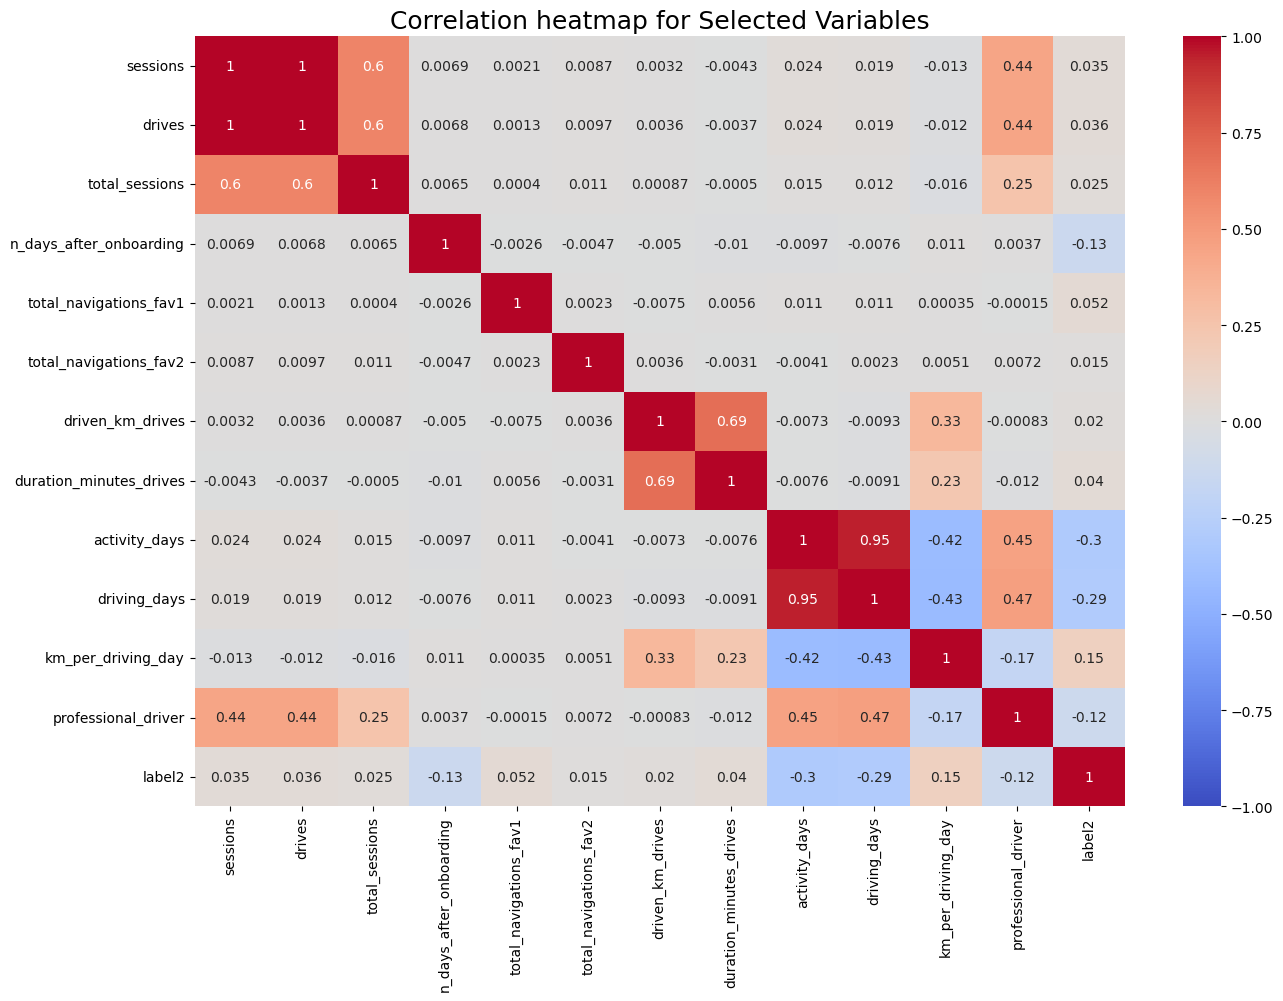

In [278]:
# Plot the correlation heatmap
# Define the variables you want to include in the correlation matrix
variables_of_interest = [
    'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 
    'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 
    'duration_minutes_drives', 'activity_days', 'driving_days', 
    'km_per_driving_day', 'professional_driver', 'label2'
]

# Calculate the correlation matrix for the selected variables
correlation_matrix = df[variables_of_interest].corr(method='pearson')

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for Selected Variables', fontsize=18)
plt.show()

Note that id there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7(arbitrary treshold), these variables are strongly multicollinear therefore only one should be included in the model.

In this case we have both `sessions` and `drives` having a correlation of 1 and both `driving_days` and `activity_days` having a correlation of 0.95

### Creare dummies (if necessary)

By deciding to have `device` as a feature, it's necessary to create a dummy variable since this is categorical.

To do so we create a new column called `device2` in which `Android` is represented by `0` and `iPhone` by `1`.

In [283]:
# Create new `device2` variable
df['device2'] = np.where(df['device'] == 'Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### Model building

**Assign predictor variables and target**
In order to build the model we need to define the features (X variables) and the target (y variable) we want to predict.

The features are: `label`, `label2`, `device`, `sessions`, `driving_days`

In [288]:
# Isolate predictor variables 
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Now we isolate the dependent (target) variable assigning it to `y`

In [291]:
y = df['label2']

**Split the data**

Split the data into test and train data

In [295]:
# Perform the train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Fit the model on `X_train` and `y_train`

In [304]:
model = LogisticRegression(penalty=None, max_iter=400)

model.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

**Check final assumption**

Verify the linear relationship between X and the estimated log odd by making a regplot.

We call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. Afterwards, we assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [307]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities 

array([[0.69880449, 0.30119551],
       [0.80319463, 0.19680537],
       [0.57828145, 0.42171855],
       ...,
       [0.59012074, 0.40987926],
       [0.83727739, 0.16272261],
       [0.92495958, 0.07504042]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [312]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `activity_days`.

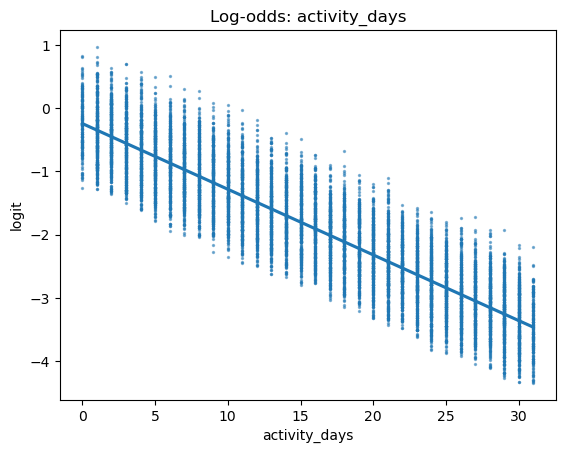

In [315]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

### Results and evaluation

In [318]:
# Generate predictions on X_test
y_pred = model.predict(X_test)

Now we use the `score()` method on the model with `X_test` and `y_test` as its two arguments.

In [321]:
# Score the model(accuracy) on the test data
model.score(X_test, y_test)

0.8225580744472432

A good addition could be a confusion matrix which can give a better idea of the predictions

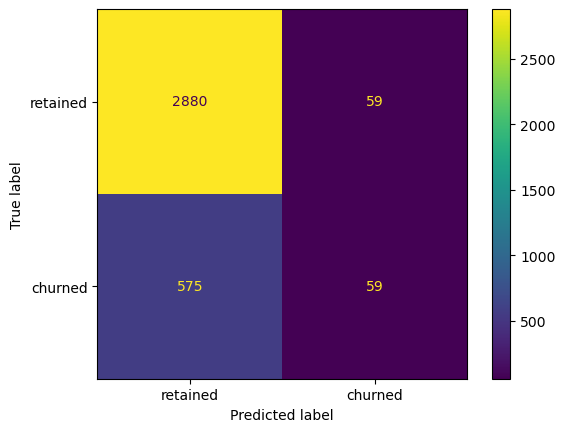

In [326]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [330]:
# Create classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2939
     churned       0.50      0.09      0.16       634

    accuracy                           0.82      3573
   macro avg       0.67      0.54      0.53      3573
weighted avg       0.77      0.82      0.77      3573



The model has a mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn as we can see also by the confusion matrix.

Even though the precision is low, we can create a barplot that measures the importance of the model's coefficients.

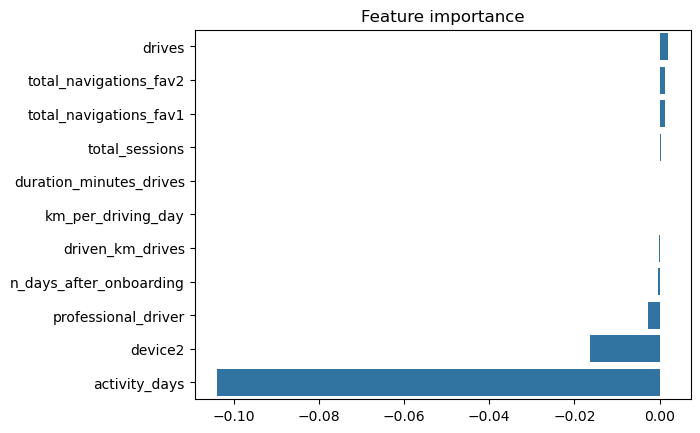

In [334]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### Observations

In analyzing the model's predictions, the variable `activity_days` emerged as the most influential predictor. This variable showed a negative correlation with user churn, meaning that as activity days increased, the likelihood of churn decreased. This was not surprising, as `activity_days` was strongly correlated with `driving_days`, which, as identified in the exploratory data analysis (EDA), also had a negative correlation with churn. However, despite this strong correlation, some other variables did not perform as expected in the model.

For instance, `km_per_driving_day` was initially thought to be a strong predictor of churn, especially considering its increasing correlation with churn observed in the EDA. Surprisingly, the correlation heatmap in this notebook revealed that it had the strongest positive correlation with churn among all the predictors, yet it was only the second-least-important variable in the model. This discrepancy highlights a key characteristic of multiple logistic regression models: interactions between variables can sometimes lead to unexpected relationships, as they may cancel each other out or change the impact of individual features. This ability to capture interactions adds predictive power to the model, but also complicates its interpretability.

Regarding the model's usefulness for Waze, the decision hinges on the intended application. If the model were to be used to drive critical business decisions, such as targeting high-risk users, the poor recall score suggests it may not be reliable enough for such purposes. However, if the model were meant to inform further exploratory analysis, it could still provide value by highlighting interesting relationships for deeper investigation.

To improve the model, a few steps could be taken. First, feature engineering could create new variables based on domain knowledge, as this often enhances the model’s predictive power. For example, one engineered feature, `professional_driver`, was the third-most important predictor. Scaling the predictor variables could also improve model performance, as could experimenting with different combinations of features to reduce noise from less informative variables.

Additionally, incorporating more granular features would likely improve the model’s predictive ability. For example, having drive-level information, such as drive times and geographic locations, could provide insights into user behavior. Moreover, understanding user interaction with the app—like how often they report or confirm road hazards—could add valuable context. Finally, knowing the monthly count of unique starting and ending locations for each driver could provide further nuance to the model, potentially improving its accuracy in predicting churn.

## Machine learning model

In [356]:
# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Modeling workflow and model selection process

The final modeling dataset contains 14292 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in ~2,860 samples in the validation set and the same number in the test set, of which ~18%—or 515 samples—would represent users who churn.

2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set.

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### Split the data

1.  Define variable `X` that isolates the features.
2.  Define variable `y` that isolates the target variable (`label2`).
3.  Split the data 80/20 into a interim training set and test set. A key aspect is the stratification of the split and setting the random state to 42
4.  Split the interim training set 75/25 into training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, we need to stratify the splits and set the random state.

In [346]:
# 1. Isolate X variables 
X = df.drop(columns=['label', 'label2', 'device'])

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, 
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

Verify the number of samples in the partitioned data.

In [349]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8574
2859
2859


This aligns with expectations

### Modeling

**Random forest**

Let's begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>


In [358]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Fit the model to the training data.

In [361]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 37.5 s, sys: 89.2 ms, total: 37.6 s
Wall time: 37.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Examin the best average score across all the validation folds.

In [364]:
# Examine best score
rf_cv.best_score_

0.11973684210526316

Examine the best combination of hyperparameters.

In [367]:
# Examine the best hyperparameters combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

We now create a function`make_results()` to output all of the scores of the model.

In [370]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to `make_results()` function.

In [375]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.428593,0.119737,0.18693,0.815722


Aside from the accuracy, the scores aren't that good. However, recall that when we built the logistic regression model in the last course the recall was ~0.09, which means that this model has 33% better recall and about the same accuracy, and was trained with less data.

**XGBoost**

Let's try to improve the scores using XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [379]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [381]:
%%time 
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 15s, sys: 33.3 s, total: 1min 48s
Wall time: 11.3 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [383]:
# Examine the best score
xgb_cv.best_score_

# Examine best parameters
xgb_cv.best_params_

# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.428593,0.119737,0.186930,0.815722
0,XGB cv,0.372011,0.164474,0.227301,0.802076


It seems that the model is worse at fitting the data for both precision and accuracy while we have a little increase for recall and F1.

### Model selection

Now, we use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

**Random forest**

In [387]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [390]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [392]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.428593,0.119737,0.186930,0.815722
0,XGB cv,0.372011,0.164474,0.227301,0.802076
0,RF val,0.480769,0.147929,0.226244,0.820567


**XGBoost**

Now we do the same to get the performance scores of the XGBoost model on the validation data.

In [395]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.428593,0.119737,0.186930,0.815722
0,XGB cv,0.372011,0.164474,0.227301,0.802076
0,RF val,0.480769,0.147929,0.226244,0.820567
0,XGB val,0.401015,0.155819,0.224432,0.809024


### Use champion model to predict the test data

This final step is to give a final indication of how you should expect the model to perform on new future data, should we decide to use the model.

In [398]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.428593,0.119737,0.186930,0.815722
0,XGB cv,0.372011,0.164474,0.227301,0.802076
0,RF val,0.480769,0.147929,0.226244,0.820567
0,XGB val,0.401015,0.155819,0.224432,0.809024
0,XGB test,0.391111,0.173570,0.240437,0.805526


The recall was very close to the same as it was on the validation data, but the precision declined notably, which caused the other scores to drop slightly.

### Confusion matrix

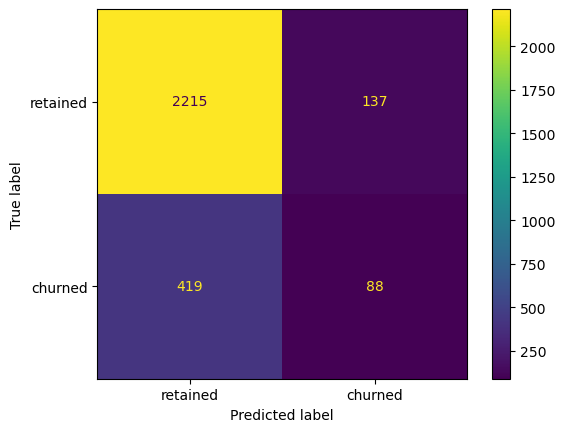

In [402]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

The model predicted almost three times as many false positives than it did for false negatives, and it correctly identified only 3% of the users who actually churned

### Feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

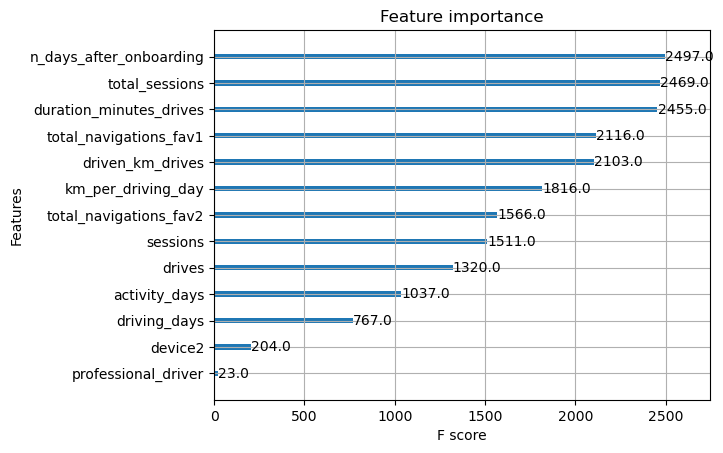

In [406]:
plot_importance(xgb_cv.best_estimator_)

### Conclusions

This project provides insights into the strengths and limitations of the current model for predicting user churn. The model’s utility depends heavily on the intended application. For making high-stakes business decisions, the model’s limited predictive strength, particularly reflected in its poor recall score, suggests it may not be reliable enough. However, it could still serve as a valuable exploratory tool, offering insights into which variables may deserve further investigation to better understand user behavior.

A key tradeoff in the model-building process was the decision to split the data into training, validation, and test sets. While this approach reduces the amount of data available for training, it allows for more rigorous model selection by reserving a validation set for tuning and a test set for an unbiased assessment of model performance. This three-way split ultimately provides a more accurate prediction of the model’s performance on new data than a simpler two-way split.

In choosing the model type, several considerations were weighed. Logistic regression was advantageous for its interpretability, as it provides clear coefficients that indicate both the importance and the direction (positive or negative) of each predictor’s relationship to churn. This transparency can help stakeholders understand the factors contributing to user churn more easily. Conversely, ensemble models like random forest or XGBoost offer stronger predictive power, which is often prioritized in classification tasks. These models also have the benefit of requiring less preprocessing and fewer assumptions about data distributions, making them simpler to apply to raw data. However, this increase in predictive strength often comes at the cost of interpretability.

Improving the model further could involve engineering new features based on domain knowledge, as these features were among the most predictive in the current model. Additionally, experimenting with different combinations of predictors might reduce noise from less informative variables. For more substantial model improvements, having access to more granular data would be highly beneficial. Drive-level data, including specific information like drive times and geographic details, as well as user engagement metrics (such as interactions with road hazard alerts), would provide richer insights. Similarly, tracking unique monthly routes could help capture behavioral patterns that are currently unavailable, potentially leading to more precise churn predictions.